# Data Analysis of ports

## Summary statistics

In [1]:
folder_name = '90739-iuu-systems-project/'
import sys
sys.path.insert(1, sys.path[0].partition(folder_name)[0] + folder_name)
import pandas as pd
import difflib 
import pycountry
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.2)
color = sns.color_palette("tab10", 10)[0]

In [2]:
wd = "/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/"

In [3]:
reefers = pd.read_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/data/proc/labels/classified_carriers_v1.csv')
path = '/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/data/xlsx/gfw_data-v2.xlsx'
port_visits = pd.read_excel(path, sheet_name='carrier_port_visit-v2')

Cleaning

In [4]:
port_visits.loc[((port_visits['port.name'] == 'ST PETERSBURG')&(port_visits['port.country'] == 'RUS')), 'port.name'] = 'SANKT-PETERBURG'
port_visits.loc[((port_visits['port.name'] == 'ANTWERP')&(port_visits['port.country'] == 'NLD')), 'port.country'] = 'BEL'
port_visits.loc[((port_visits['port.name'] == 'PANAMA CITY')&(port_visits['port.country'] == 'PAN')), 'port.name'] = 'BALBOA'
port_visits.loc[((port_visits['port.name'] == 'COLON')&(port_visits['port.country'] == 'PAN')), 'port.name'] = 'PUERTO COLON'
port_visits.loc[((port_visits['port.name'] == 'LOME')&(port_visits['port.country'] == 'GHA')), 'port.country'] = 'TGO'
port_visits.loc[((port_visits['port.name'] == 'MATADI')&(port_visits['port.country'] == 'AGO')), 'port.country'] = 'COD'

In [5]:
path = '/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/data/input/World_Port_Index/WPI.csv'
wpi = pd.read_csv(path)

In [6]:
## pre-processing reefers

reefers['share_of_loitering'] = reefers['loitering']/(reefers['encounter']+reefers['loitering'])
reefers['more_than_100_encounters'] = reefers['loitering'] + reefers['encounter'] > 100

In [16]:
top_120 = pd.read_csv(wd + 'port_evaluation/data/proc/GFW/top10percent.csv')

/var/folders/8z/3jxkd1111yv6m0gf9g9kqmdr0000gn/T/ipykernel_40615/796739475.py:1: DtypeWarning: Columns (11,12,13,14,15,42,43,44,47) have mixed types. Specify dtype option on import or set low_memory=False.
  top_120 = pd.read_csv(wd + 'port_evaluation/data/proc/GFW/top10percent.csv')


,Unnamed: 0,id_loitering,type,start,end,lat,lon,vessel.id,vessel.type,vessel.mmsi,...,posCount,shipname,source,vesselType,years,dataset,score,alpha_3,alpha_2,flag_country
0,0,08373fbdc30976511c4fd237d1c796f6,loitering,2013-01-07 13:03:14.000,2013-01-08 01:45:25.000,-12.088447,61.467927,035a653cf-fb0c-a148-4f7b-8dfaf2a806f8,carrier,416308000,...,1305363.0,CHEN YU NO.7,AIS,Carrier,"2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019...",public-global-carrier-vessels:v20201001,1.0,TWN,TW,Taiwan
1,1,3f172225314fbf5c243c926706ff15d8,loitering,2013-01-07 02:00:14.000,2013-01-07 06:48:33.000,-12.404810,60.455511,035a653cf-fb0c-a148-4f7b-8dfaf2a806f8,carrier,416308000,...,1305363.0,CHEN YU NO.7,AIS,Carrier,"2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019...",public-global-carrier-vessels:v20201001,1.0,TWN,TW,Taiwan
2,2,8ada58fe6b417c0919a922f11f23efc1,loitering,2013-01-07 21:55:01.000,2013-01-07 23:36:12.000,-8.499583,-6.014750,036391f88-8a1b-98ed-c82d-d5871e837971,carrier,577106000,...,547568.0,HARIMA 2,AIS,Carrier,"2012, 2013, 2014, 2015, 2016, 2017, 2018",public-global-carrier-vessels:v20201001,1.0,VUT,VU,Vanuatu
3,3,e76f1af183ff7a32b0bf0f52e3cfbec6,loitering,2013-01-07 01:55:16.000,2013-01-07 06:52:15.000,-12.256155,61.902765,1512ca283-37b5-2737-87b9-047cf0f30433,carrier,352894000,...,1354790.0,TUNA QUEEN,AIS,Carrier,"2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019...",public-global-carrier-vessels:v20201001,1.0,PAN,PA,Panama
4,4,3816185f2d8931b10b2d2ef818519eb6,loitering,2013-01-07 23:53:05.000,2013-01-08 06:26:35.000,-12.262177,60.196520,1512ca283-37b5-2737-87b9-047cf0f30433,carrier,352894000,...,1354790.0,TUNA QUEEN,AIS,Carrier,"2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019...",public-global-carrier-vessels:v20201001,1.0,PAN,PA,Panama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124160,279513,f50565e9bd50ea3075c29d3663cbfd54,loitering,2022-08-31 18:55:13,2022-08-31 23:57:26,43.812300,155.423500,0f0d7d238-885d-6700-6e89-b1fac6c60eaa,carrier,374173000,...,345461.0,HAN XING,AIS,Carrier,"2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022",public-global-carrier-vessels:v20201001,1.0,PAN,PA,Panama
124161,279517,004b5a2d9989fe444fa6e1113edb5ae5,loitering,2022-08-31 19:51:38,2022-08-31 23:47:10,20.507500,59.385100,edbcdcb9d-d699-0659-8cbf-7d4eef908205,carrier,259758000,...,771681.0,OCEAN FRESH,AIS,Carrier,"2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019...",public-global-carrier-vessels:v20201001,1.0,NOR,NO,Norway
124162,279519,0fd0de90657f7c4555c17de80178dcd6,loitering,2022-08-31 21:53:35,2022-08-31 23:59:05,10.969900,-23.839000,901bf1ab6-6ca9-8e0e-22bd-4d576a8a3ddc,carrier,370599000,...,1522205.0,IBUKI,AIS,Carrier,"2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021...",public-global-carrier-vessels:v20201001,1.0,PAN,PA,Panama
124163,279522,f70932941772f8a3b11ecad8f9f9f754,loitering,2022-08-31 22:53:51,2022-08-31 23:42:16,45.501100,143.628200,6237fb351-1745-cb64-bc74-4802a5e1c467,carrier,273349480,...,573960.0,SOLID,AIS,Carrier,"2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021...",public-global-carrier-vessels:v20201001,1.0,RUS,RU,Russia


In [39]:
print(port_visits.columns)
port_visits = port_visits.loc[port_visits['vessel.id'].isin(top_120['vessel.id'])] ## change this back
port_vessel_count = port_visits.groupby(['port.name', 'port.country', 'vessel.id'])['id'].count().reset_index()
port_vessel_with_label = port_vessel_count.merge(reefers, how='left', left_on='vessel.id', right_on='id', suffixes=('_port', '_carrier'))
share_of_loitering = port_vessel_with_label.groupby(['port.country','port.name'])['share_of_loitering'].mean().reset_index()
number_of_bad_visits = port_vessel_with_label.groupby(['port.country','port.name'])['label'].sum().reset_index()
share_of_bad_visits = port_vessel_with_label.groupby(['port.country','port.name'])['label'].mean().reset_index()
# ports_summary = port_visits_known_ships.merge(share_of_loitering, on='port.name', how='left')
ports_summary = share_of_loitering.merge(number_of_bad_visits, on='port.name', how='left')
ports_summary = ports_summary.merge(share_of_bad_visits, on='port.name', how='left', suffixes=('_absolute_count', '_avg'))

Index(['id', 'type', 'start', 'end', 'lat', 'lon', 'vessel.id', 'vessel.type',
       'vessel.mmsi', 'vessel.name', 'vessel.flag',
       'vessel.origin_port.country', 'vessel.origin_port.name',
       'vessel.destination_port.country', 'vessel.destination_port.name',
       'vessel.authorizations.authorized', 'vessel.authorizations.unknown',
       'median_speed_knots', 'elevation_m', 'distance_from_shore_m',
       'distance_from_port_m', 'regions.rfmo', 'encounter.median_distance_km',
       'encounter.authorization_status', 'encounter.encountered_vessel.id',
       'encounter.encountered_vessel.type',
       'encounter.encountered_vessel.mmsi',
       'encounter.encountered_vessel.name',
       'encounter.encountered_vessel.flag',
       'encounter.encountered_vessel.origin_port.country',
       'encounter.encountered_vessel.origin_port.name',
       'encounter.encountered_vessel.destination_port.country',
       'encounter.encountered_vessel.destination_port.name',
       'encount

In [18]:
ports_summary.loc[ports_summary['port.country_x']=='JPN'].sort_values('label_absolute_count', ascending=False).head(20)

,port.country_x,port.name,share_of_loitering,port.country_y,label_absolute_count,port.country,label_avg
291,JPN,SHIMIZU,0.823487,JPN,39,JPN,0.847826
306,JPN,YOKOSUKA,0.826062,JPN,35,JPN,0.875000
297,JPN,TOKYO,0.922171,JPN,14,JPN,1.000000
284,JPN,ONOMICHI-ITOZAKI,0.821142,JPN,13,JPN,0.866667
304,JPN,YAWATAHAMA,0.857660,JPN,8,JPN,0.888889
270,JPN,KUSHIKINO,0.838784,JPN,8,JPN,1.000000
294,JPN,TAGAJO-SHI,0.810817,JPN,6,JPN,1.000000
252,JPN,HAKATA,0.885511,JPN,5,JPN,1.000000
277,JPN,MOMBETSU KO,0.999213,JPN,5,JPN,1.000000
285,JPN,OSAKA,0.866655,JPN,5,JPN,1.000000


In [10]:
data = [[country.alpha_3, country.alpha_2, country.name] for country in pycountry.countries]

countries = pd.DataFrame(data, columns=['alpha_3', 'alpha_2', 'name'])

# FIXES
wpi.loc[wpi['PORT_NAME,C,254'] == "WALVIS BAY",'COUNTRY,C,254'] = "NA"
wpi.loc[wpi['PORT_NAME,C,254'] == "HONG KONG",'COUNTRY,C,254'] = "CN"

# MERGE
wpi_w_country = wpi.merge(countries, how='left', left_on='COUNTRY,C,254', right_on='alpha_2')


In [11]:
gfw_port = port_visits[['port.lat', 'port.lon', 'port.country', 'port.name']]
gfw_port = gfw_port.groupby(['port.name', 'port.country']).mean().reset_index()
ports_summary = ports_summary.merge(gfw_port, on='port.name', how='left')

In [12]:
manual_matched = {
    'SINGAPORE': 'KEPPEL - (EAST SINGAPORE)',
    'SAINT PETERSBURG': 'SANKT-PETERBURG',
    'ADMIRALTEISKY': 'SANKT-PETERBURG',
    'SKAGEN': 'SKAGEN HAVN',
    'NIEUW- EN SINT JOOSLAND': 'VLISSINGEN',
    'MAJURO': 'MAJURO ATOLL',
    'POHNPEI': 'POHNPEI HARBOR',
    'VELSEN-NOORD': 'IJMUIDEN',
    'QINGDAO': 'QINGDAO GANG',
    'TARAWA': 'TARAWA ATOLL',
    'GUAYAQUIL GULF': 'PUERTO MARITIMO DE GUAYAQUIL',
    'CALLAO': 'PUERTO DEL CALLAO',
    'BERKELEY SOUND': 'STANLEY',
    'GOTHENBURG': 'GOTEBORG',
    'TOKYO': 'TOKYO KO',
    'MOIN': 'PUERTO MOIN',
    'SALTANGARA': 'RUNAVIK',
    'GUADARRANQUE': 'ALGECIRAS',
    'SUEZ': 'AS SUWAYS',
    'BORSSELE': 'VLISSINGEN',
    'PHRA PRADAENG': 'BANGKOK',
    'RECALADA': 'MONTEVIDEO',
    'PORT SAID': 'BUR SAID (PORT SAID)',
    'SEKONDI-TAKORADI': 'TAKORADI',
    'POSORJA': 'PUERTO MARITIMO DE GUAYAQUIL'
    # 'ST PETERSBURG': 'SANKT-PETERBURG'
}

In [13]:
## fuzzy matching
ports_summary['port_matched'] = ports_summary['port.name'].apply(lambda x: ''.join(difflib.get_close_matches(str(x), wpi_w_country['PORT_NAME,C,254'], n=1, cutoff=0.8)))

for key in manual_matched.keys():
    ports_summary.loc[ports_summary['port.name'] == key, 'port_matched'] = manual_matched[key]
ports_matched = ports_summary.merge(wpi_w_country, how='left', left_on=['port_matched','port.country'], right_on=['PORT_NAME,C,254','alpha_3'],)


In [14]:
ports_matched.loc[ports_matched['HARBORSIZE,C,254'].isna(),:].sort_values(by='label_absolute_count',ascending=False).head(15)

,port.name,share_of_loitering,label_absolute_count,label_avg,port.country,port.lat,port.lon,port_matched,"INDEX_NO,N,16,6","REGION_NO,N,16,6",...,"FUEL_OIL,C,254","DIESEL,C,254","DECKSUPPLY,C,254","ENG_SUPPLY,C,254","REPAIRCODE,C,254","DRYDOCK,C,254","RAILWAY,C,254",alpha_3,alpha_2,name
2144,SINGAPORE,0.915148,550.0,0.963222,MYS,1.660950,104.594164,KEPPEL - (EAST SINGAPORE),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,ARNEMUIDEN,0.994960,120.0,1.000000,NLD,51.452462,3.587500,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1329,LONDON,0.915784,107.0,0.981651,KIR,1.982373,-157.499609,LONDON,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1832,PORTSMOUTH,0.999185,99.0,1.000000,GBR,50.705088,-1.084368,PORTSMOUTH,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2470,VICTORIA,0.930223,98.0,0.989899,CAN,48.343793,-123.353623,VICTORIA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1369,MALTA,0.958736,95.0,0.989583,MLT,35.915676,14.676923,ALTA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825,FUNAFUTI,0.900679,95.0,0.979381,TUV,-8.501402,178.379840,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1086,JINHAE MAN,0.811393,92.0,0.754098,KOR,35.018909,128.660835,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,BANG KHO LAEM,0.911137,88.0,0.988764,THA,13.632248,100.528297,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022,SAN ANTONIO ESTE,0.990097,83.0,1.000000,ARG,-40.844472,-64.781923,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ports_matched.sort_values(by='label_absolute_count',ascending=False).head(15)[['port.name', 'port.country', 'port_matched', 'COUNTRY,C,254', 'PORT_NAME,C,254']]

,port.name,port.country,port_matched,"COUNTRY,C,254","PORT_NAME,C,254"
515,BUSAN,KOR,ULSAN,KR,ULSAN
2145,SINGAPORE,SGP,KEPPEL - (EAST SINGAPORE),SG,KEPPEL - (EAST SINGAPORE)
2144,SINGAPORE,MYS,KEPPEL - (EAST SINGAPORE),NaN,NaN
371,BALBOA,PAN,BALBOA,PA,BALBOA
1867,PUERTO COLON,PAN,PUERTO COLON,PA,PUERTO COLON
1283,LAS PALMAS,ESP,LAS PALMAS,ES,LAS PALMAS
2598,ZHOUSHAN,CHN,ZHOUSHAN,CN,ZHOUSHAN
1858,PUERTO BOLIVAR,COL,PUERTO BOLIVAR,CO,PUERTO BOLIVAR
1859,PUERTO BOLIVAR,ECU,PUERTO BOLIVAR,EC,PUERTO BOLIVAR
222,ABIDJAN,CIV,ABIDJAN,CI,ABIDJAN


In [16]:
all_data = ports_matched \
    .merge(port_visits, on='port.name', how='left')

all_data['year'] = all_data['start'].str[:4]

all_data = all_data.groupby(['port.name', 'year'])['label_absolute_count'].sum().reset_index()

In [17]:
all_data = ports_matched \
    .merge(port_visits, on='port.name', how='left')

all_data['year'] = all_data['start'].str[:4]

all_data = all_data.loc[all_data['vessel.id'].isin(reefers['id']),:]

all_data = all_data.groupby(['port.name', 'year']).count().reset_index()

all_data = all_data[['port.name','year','share_of_loitering']].rename({'share_of_loitering':'number_of_visits'},axis = 1)

csv by port size

In [18]:
large_ports = ports_matched.loc[ports_matched['HARBORSIZE,C,254'] == 'L',:] \
    .sort_values(by='label_absolute_count',ascending=False) \
    .head(15)
large_ports.to_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/data/proc/ports/large_ports.csv')
large_ports

,port.name,share_of_loitering,label_absolute_count,label_avg,port.country,port.lat,port.lon,port_matched,"INDEX_NO,N,16,6","REGION_NO,N,16,6",...,"FUEL_OIL,C,254","DIESEL,C,254","DECKSUPPLY,C,254","ENG_SUPPLY,C,254","REPAIRCODE,C,254","DRYDOCK,C,254","RAILWAY,C,254",alpha_3,alpha_2,name
2145,SINGAPORE,0.915148,550.0,0.963222,SGP,1.346778,103.810522,KEPPEL - (EAST SINGAPORE),50000.0,49990.0,...,Y,Y,Y,Y,A,L,S,SGP,SG,Singapore
1283,LAS PALMAS,0.968288,427.0,0.981609,ESP,28.121059,-15.391801,LAS PALMAS,38170.0,38140.0,...,Y,NaN,NaN,NaN,B,NaN,L,ESP,ES,Spain
222,ABIDJAN,0.967003,309.0,0.984076,CIV,5.239332,-4.018913,ABIDJAN,46000.0,45960.0,...,Y,Y,Y,Y,B,S,NaN,CIV,CI,Côte d'Ivoire
2004,SAINT PETERSBURG,0.972342,297.0,0.973770,RUS,59.884437,30.159237,SANKT-PETERBURG,28370.0,28250.0,...,Y,NaN,Y,Y,A,NaN,M,RUS,RU,Russian Federation
2047,SANKT-PETERBURG,0.974185,296.0,0.976898,RUS,60.016455,29.400889,SANKT-PETERBURG,28370.0,28250.0,...,Y,NaN,Y,Y,A,NaN,M,RUS,RU,Russian Federation
545,CAPE TOWN,0.950359,290.0,0.983051,ZAF,-33.895129,18.410600,CAPE TOWN,46770.0,46725.0,...,Y,Y,Y,Y,A,L,L,ZAF,ZA,South Africa
719,DURBAN,0.976496,262.0,0.996198,ZAF,-29.836080,31.077707,DURBAN,46850.0,46725.0,...,Y,Y,Y,Y,B,L,L,ZAF,ZA,South Africa
643,DALIAN,0.791376,260.0,0.751445,CHN,38.952360,121.868186,DALIAN,60250.0,59850.0,...,Y,NaN,Y,Y,A,M,M,CHN,CN,China
1269,LAGOS,0.951502,232.0,0.970711,NGA,6.312839,3.364678,LAGOS,46130.0,46120.0,...,Y,Y,Y,Y,C,M,M,NGA,NG,Nigeria
233,ADMIRALTEISKY,0.982833,224.0,0.986784,RUS,59.903832,30.167636,SANKT-PETERBURG,28370.0,28250.0,...,Y,NaN,Y,Y,A,NaN,M,RUS,RU,Russian Federation


In [19]:
medium_ports = ports_matched.loc[ports_matched['HARBORSIZE,C,254'] == 'M',:] \
    .sort_values(by='label_absolute_count',ascending=False) \
    .head(15)
medium_ports.to_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/data/proc/ports/medium_ports.csv')
medium_ports

,port.name,share_of_loitering,label_absolute_count,label_avg,port.country,port.lat,port.lon,port_matched,"INDEX_NO,N,16,6","REGION_NO,N,16,6",...,"FUEL_OIL,C,254","DIESEL,C,254","DECKSUPPLY,C,254","ENG_SUPPLY,C,254","REPAIRCODE,C,254","DRYDOCK,C,254","RAILWAY,C,254",alpha_3,alpha_2,name
515,BUSAN,0.849673,692.0,0.837772,KOR,35.038632,129.039422,ULSAN,60400.0,60315.0,...,Y,Y,NaN,NaN,C,M,M,KOR,KR,"Korea, Republic of"
371,BALBOA,0.962874,468.0,0.985263,PAN,8.957531,-79.585912,BALBOA,15410.0,15380.0,...,Y,Y,Y,Y,A,L,M,PAN,PA,Panama
1867,PUERTO COLON,0.964614,450.0,0.984683,PAN,9.322886,-79.905398,PUERTO COLON,9865.0,9820.0,...,Y,NaN,NaN,NaN,N,NaN,S,PAN,PA,Panama
761,EUROPA POINT,0.981289,305.0,1.000000,GIB,36.106506,-5.355984,EUROPA POINT,38330.0,38320.0,...,Y,Y,Y,Y,A,M,S,GIB,GI,Gibraltar
2524,WEIHAI,0.866633,294.0,0.918750,CHN,36.913766,122.385569,WEIHAI,60150.0,59850.0,...,Y,NaN,Y,NaN,NaN,NaN,NaN,CHN,CN,China
640,DAKAR,0.984766,273.0,1.000000,SEN,14.656881,-17.403562,DAKAR,45820.0,45817.0,...,Y,Y,Y,Y,B,M,L,SEN,SN,Senegal
1593,NOUADHIBOU,0.956105,255.0,0.969582,MRT,20.828737,-17.038624,NOUADHIBOU,45812.0,45810.0,...,Y,Y,N,N,C,NaN,L,MRT,MR,Mauritania
694,DOUALA,0.967338,218.0,0.986425,CMR,3.953944,9.583459,DOUALA,46280.0,46250.0,...,Y,Y,Y,Y,A,L,L,CMR,CM,Cameroon
1569,NIEUW- EN SINT JOOSLAND,0.986269,217.0,0.990868,NLD,51.459886,3.589777,VLISSINGEN,31210.0,30980.0,...,Y,Y,Y,Y,A,M,S,NLD,NL,Netherlands
1120,KAOHSIUNG,0.877893,214.0,0.942731,TWN,22.556778,120.288278,KAO-HSIUNG,57920.0,57880.0,...,Y,Y,NaN,NaN,B,L,S,TWN,TW,"Taiwan, Province of China"


In [20]:
small_ports = ports_matched.loc[ports_matched['HARBORSIZE,C,254'] == 'S',:] \
    .sort_values(by='label_absolute_count',ascending=False) \
    .head(15)
small_ports.to_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/data/proc/ports/small_ports.csv')
small_ports

,port.name,share_of_loitering,label_absolute_count,label_avg,port.country,port.lat,port.lon,port_matched,"INDEX_NO,N,16,6","REGION_NO,N,16,6",...,"FUEL_OIL,C,254","DIESEL,C,254","DECKSUPPLY,C,254","ENG_SUPPLY,C,254","REPAIRCODE,C,254","DRYDOCK,C,254","RAILWAY,C,254",alpha_3,alpha_2,name
2598,ZHOUSHAN,0.862232,412.0,0.874735,CHN,30.026762,122.324997,ZHOUSHAN,59960.0,59850.0,...,NaN,Y,NaN,NaN,C,M,NaN,CHN,CN,China
1858,PUERTO BOLIVAR,0.982370,311.0,1.000000,COL,12.265718,-72.016549,PUERTO BOLIVAR,11946.0,11860.0,...,N,N,NaN,NaN,N,NaN,M,COL,CO,Colombia
2326,TEMA,0.962598,300.0,0.980392,GHA,5.577731,0.027976,TEMA,46070.0,46010.0,...,Y,Y,Y,Y,B,M,M,GHA,GH,Ghana
2154,SKAGEN,0.965619,249.0,0.961390,DNK,57.677263,10.669752,SKAGEN HAVN,30440.0,30020.0,...,Y,NaN,NaN,Y,C,NaN,S,DNK,DK,Denmark
900,GUAYAQUIL,0.987604,247.0,1.000000,ECU,-2.333084,-79.975940,GUAYAQUIL,15270.0,15240.0,...,Y,NaN,Y,Y,C,S,M,ECU,EC,Ecuador
1784,PORT LOUIS,0.902681,216.0,0.981818,MUS,-20.133792,57.475073,PORT LOUIS,47720.0,47710.0,...,Y,Y,Y,Y,B,M,NaN,MUS,MU,Mauritius
1023,IJMUIDEN,0.964178,200.0,0.970874,NLD,52.466775,4.542396,IJMUIDEN,31040.0,30980.0,...,Y,NaN,NaN,Y,C,NaN,S,NLD,NL,Netherlands
1736,POHNPEI,0.905191,187.0,0.968912,FSM,6.989443,158.171949,POHNPEI HARBOR,56590.0,56560.0,...,Y,NaN,NaN,NaN,D,NaN,NaN,FSM,FM,"Micronesia, Federated States of"
2459,VELSEN-NOORD,0.937898,185.0,0.939086,NLD,52.468577,4.597106,IJMUIDEN,31040.0,30980.0,...,Y,NaN,NaN,Y,C,NaN,S,NLD,NL,Netherlands
267,ALGECIRAS,0.986492,180.0,0.994475,ESP,36.088325,-5.398069,ALGECIRAS,38310.0,38200.0,...,Y,Y,NaN,NaN,B,L,S,ESP,ES,Spain


In [21]:
very_small_ports = ports_matched.loc[ports_matched['HARBORSIZE,C,254'] == 'V',:] \
    .sort_values(by='label_absolute_count',ascending=False) \
    .head(15)
very_small_ports.to_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/data/proc/ports/very_small_ports.csv')
very_small_ports

,port.name,share_of_loitering,label_absolute_count,label_avg,port.country,port.lat,port.lon,port_matched,"INDEX_NO,N,16,6","REGION_NO,N,16,6",...,"FUEL_OIL,C,254","DIESEL,C,254","DECKSUPPLY,C,254","ENG_SUPPLY,C,254","REPAIRCODE,C,254","DRYDOCK,C,254","RAILWAY,C,254",alpha_3,alpha_2,name
1859,PUERTO BOLIVAR,0.982370,311.0,1.000000,ECU,-3.235473,-80.021807,PUERTO BOLIVAR,15250.0,15240.0,...,NaN,N,NaN,NaN,N,NaN,S,ECU,EC,Ecuador
1359,MAJURO,0.905299,208.0,0.954128,MHL,7.104302,171.334050,MAJURO ATOLL,56400.0,56340.0,...,Y,Y,NaN,NaN,C,NaN,S,MHL,MH,Marshall Islands
1775,PORT HARCOURT,0.959210,206.0,0.990385,NGA,4.645908,7.039621,PORT HARCOURT,46210.0,46120.0,...,Y,Y,N,N,B,NaN,M,NGA,NG,Nigeria
1888,PUERTO MOIN,0.995751,184.0,1.000000,CRI,10.061495,-82.997340,PUERTO MOIN,9805.0,9800.0,...,Y,NaN,NaN,NaN,C,NaN,S,CRI,CR,Costa Rica
2312,TARAWA,0.910329,171.0,0.977143,KIR,1.381233,172.931309,TARAWA ATOLL,56450.0,56430.0,...,Y,N,Y,Y,C,NaN,NaN,KIR,KI,Kiribati
2400,TURBO,0.990431,169.0,1.000000,COL,8.039446,-76.813203,TURBO,11880.0,11860.0,...,N,N,N,N,NaN,NaN,NaN,COL,CO,Colombia
2084,SCHIEDAM,0.995274,168.0,1.000000,NLD,51.946232,4.205769,SCHIEDAM,31130.0,30980.0,...,Y,Y,NaN,Y,A,M,S,NLD,NL,Netherlands
828,FUZHOU,0.871515,162.0,0.931034,CHN,26.032559,119.724502,FUZHOU,59860.0,59850.0,...,Y,NaN,Y,NaN,C,NaN,NaN,CHN,CN,China
641,DAKHLA,0.948743,130.0,0.977444,ESH,23.633261,-16.021020,AD DAKHLA,45808.0,45805.0,...,Y,Y,NaN,NaN,C,NaN,NaN,ESH,EH,Western Sahara
1458,MOIN,0.999051,124.0,1.000000,CRI,10.106666,-82.984435,PUERTO MOIN,9805.0,9800.0,...,Y,NaN,NaN,NaN,C,NaN,S,CRI,CR,Costa Rica


In [22]:
unknown_ports = ports_matched.loc[ports_matched['HARBORSIZE,C,254'].isna(),:] \
    .sort_values(by='label_absolute_count',ascending=False) \
    .head(15)
unknown_ports.to_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/data/proc/ports/unknown_port_size.csv')
unknown_ports

,port.name,share_of_loitering,label_absolute_count,label_avg,port.country,port.lat,port.lon,port_matched,"INDEX_NO,N,16,6","REGION_NO,N,16,6",...,"FUEL_OIL,C,254","DIESEL,C,254","DECKSUPPLY,C,254","ENG_SUPPLY,C,254","REPAIRCODE,C,254","DRYDOCK,C,254","RAILWAY,C,254",alpha_3,alpha_2,name
2144,SINGAPORE,0.915148,550.0,0.963222,MYS,1.660950,104.594164,KEPPEL - (EAST SINGAPORE),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,ARNEMUIDEN,0.994960,120.0,1.000000,NLD,51.452462,3.587500,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1329,LONDON,0.915784,107.0,0.981651,KIR,1.982373,-157.499609,LONDON,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1832,PORTSMOUTH,0.999185,99.0,1.000000,GBR,50.705088,-1.084368,PORTSMOUTH,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2470,VICTORIA,0.930223,98.0,0.989899,CAN,48.343793,-123.353623,VICTORIA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1369,MALTA,0.958736,95.0,0.989583,MLT,35.915676,14.676923,ALTA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825,FUNAFUTI,0.900679,95.0,0.979381,TUV,-8.501402,178.379840,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1086,JINHAE MAN,0.811393,92.0,0.754098,KOR,35.018909,128.660835,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,BANG KHO LAEM,0.911137,88.0,0.988764,THA,13.632248,100.528297,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022,SAN ANTONIO ESTE,0.990097,83.0,1.000000,ARG,-40.844472,-64.781923,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


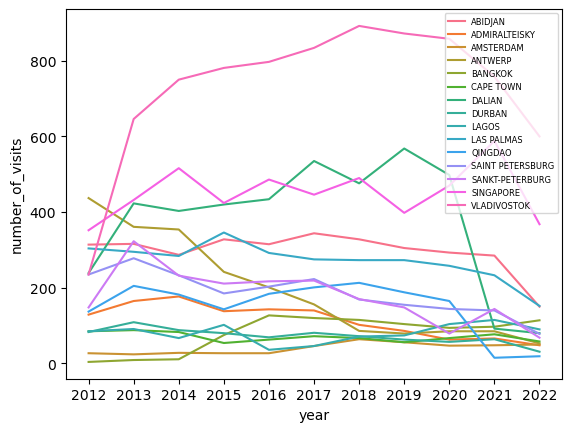

In [23]:
sns.lineplot(all_data.loc[all_data['port.name'].isin(large_ports['port.name']),:], x='year', y='number_of_visits', hue='port.name') \
    .legend(fontsize=6)
plt.show()

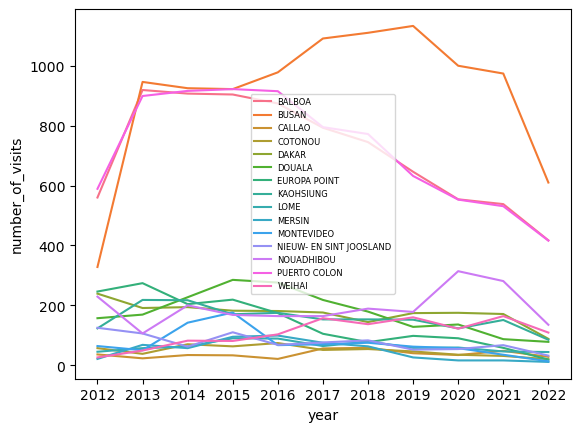

In [24]:
sns.lineplot(all_data.loc[all_data['port.name'].isin(medium_ports['port.name']),:], x='year', y='number_of_visits', hue='port.name') \
    .legend(fontsize=6)
plt.show()

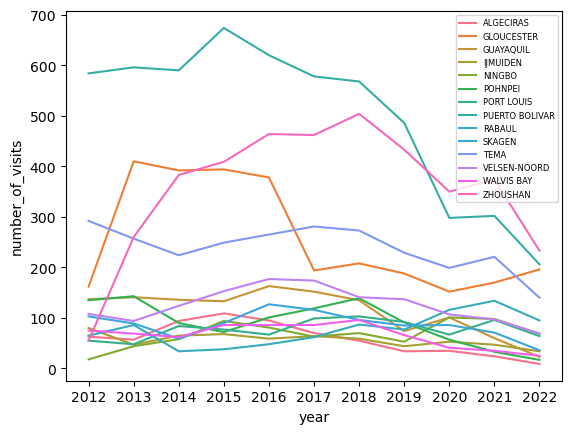

In [25]:
sns.lineplot(all_data.loc[all_data['port.name'].isin(small_ports['port.name']),:], x='year', y='number_of_visits', hue='port.name') \
    .legend(fontsize=6)
plt.show()

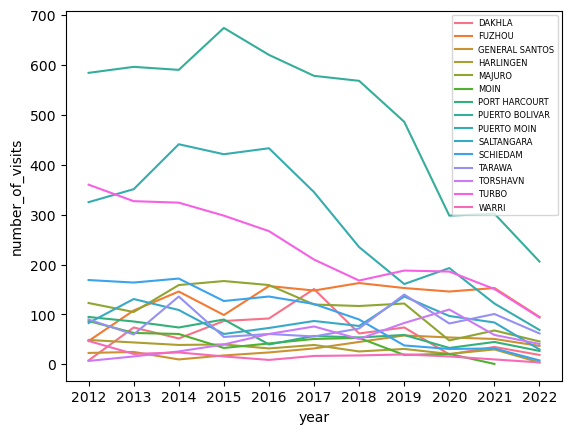

In [26]:
sns.lineplot(all_data.loc[all_data['port.name'].isin(very_small_ports['port.name']),:], x='year', y='number_of_visits', hue='port.name') \
    .legend(fontsize=6)
plt.show()

In [27]:
all_data.loc[all_data['port.name'].isin(large_ports['port.name']),:].to_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/data/proc/ports/large_ports_over_time.csv')

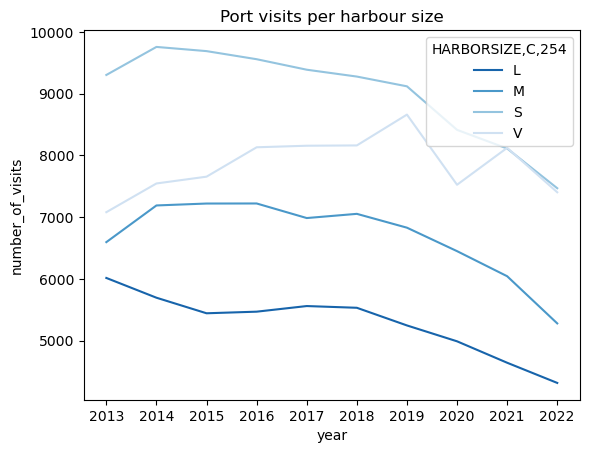

In [28]:
plot_data6 = all_data.merge(ports_matched, how='left', on='port.name') \
    .groupby(['year', 'HARBORSIZE,C,254'])['number_of_visits'] \
    .sum() \
    .reset_index()
plot_data6 = plot_data6.loc[plot_data6['year']>'2012',:].reset_index(drop=True)
for row in range(len(plot_data6)):
    if plot_data6.loc[row,'year'] == '2022':
        plot_data6.loc[row,'number_of_visits'] *= 1.333
palette = sns.color_palette("Blues", n_colors=4)
palette.reverse()
sns.lineplot(
    data=plot_data6,
    x='year',
    y='number_of_visits',
    hue='HARBORSIZE,C,254',
    palette=palette
)
plt.title('Port visits per harbour size')
plt.show()

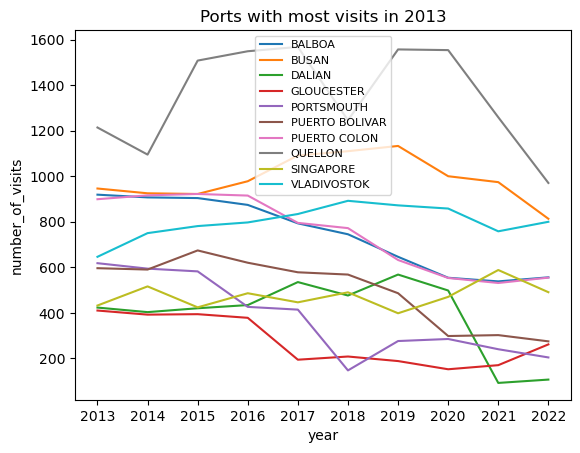

In [29]:
top_2013 = all_data.loc[all_data['year']=='2013',:] \
    .sort_values('number_of_visits', ascending=False) \
    .head(10)
plot_data7 = all_data.loc[all_data['port.name'].isin(top_2013['port.name']),:]
plot_data7 = plot_data7.loc[plot_data7['year']>'2012',:].reset_index(drop=True)
for row in range(len(plot_data7)):
    if plot_data7.loc[row,'year'] == '2022':
        plot_data7.loc[row,'number_of_visits'] *= 1.333
sns.lineplot(
    data=plot_data7,
    x='year',
    y='number_of_visits',
    hue='port.name'
).legend(fontsize=8)
plt.title('Ports with most visits in 2013')
plt.show()

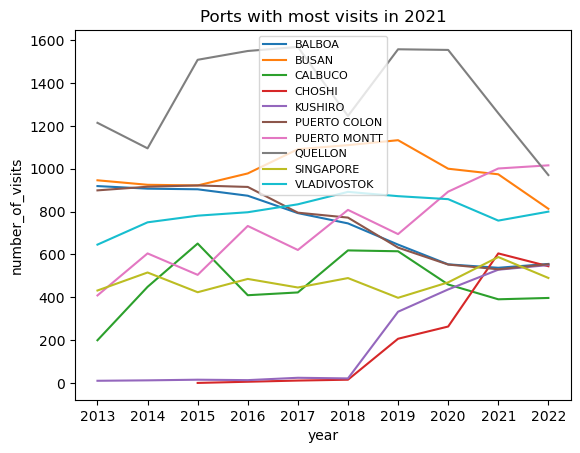

In [30]:
top_2021 = all_data.loc[all_data['year']=='2021',:] \
    .sort_values('number_of_visits', ascending=False) \
    .head(10)
plot_data7 = all_data.loc[all_data['port.name'].isin(top_2021['port.name']),:]
plot_data7 = plot_data7.loc[plot_data7['year']>'2012',:].reset_index(drop=True)
for row in range(len(plot_data7)):
    if plot_data7.loc[row,'year'] == '2022':
        plot_data7.loc[row,'number_of_visits'] *= 1.333
sns.lineplot(
    data=plot_data7,
    x='year',
    y='number_of_visits',
    hue='port.name'
).legend(fontsize=8)
plt.title('Ports with most visits in 2021')
plt.show()

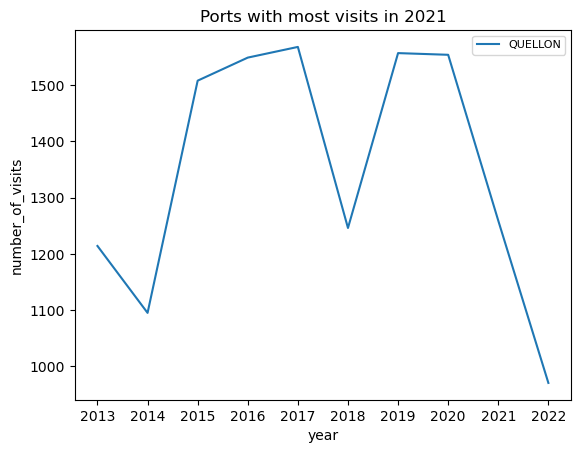

In [31]:
ports = ['PUERTO MONTT', 'CHOSHI', 'KUSHIRO', 'QUELLON', 'PUERTO COLON', 'PUERTO BOLIVAR', 'DALIAN', 'PORTSMOUTH']
top_decrease_and_increase = all_data.loc[all_data['port.name'].isin(ports),:] \
    .sort_values('number_of_visits', ascending=False) \
    .head(10)
plot_data8 = all_data.loc[all_data['port.name'].isin(top_decrease_and_increase['port.name']),:]
plot_data8 = plot_data8.loc[plot_data8['year']>'2012',:].reset_index(drop=True)
for row in range(len(plot_data8)):
    if plot_data8.loc[row,'year'] == '2022':
        plot_data8.loc[row,'number_of_visits'] *= 1.333
sns.lineplot(
    data=plot_data8,
    x='year',
    y='number_of_visits',
    hue='port.name'
).legend(fontsize=8)
plt.title('Ports with most visits in 2021')
plt.show()

In [32]:
pd.DataFrame(all_data['port.name'].unique()).to_csv(wd + 'port_evaluation/output/all_port_names')

In [33]:
all_visits_to_interesting_cases = port_visits.loc[port_visits['port.name'].isin(ports),:]
port_info_interesting_cases = port_visits.loc[port_visits['port.name'].isin(ports),:] \
    .groupby('port.name')[['lat','lon']].mean()

In [34]:
port_visits

,id,type,start,end,lat,lon,vessel.id,vessel.type,vessel.mmsi,vessel.name,...,encounter.encountered_vessel.destination_port.country,encounter.encountered_vessel.destination_port.name,encounter.encountered_vessel.authorizations.authorized,encounter.encountered_vessel.authorizations.unknown,loitering.total_distance_km,loitering.loitering_hours,port.lat,port.lon,port.country,port.name
0,af03d0b85979b8c91ae5ea165d0fd2e0,port,2012-10-24 12:21:05 UTC,2012-10-24 21:07:44 UTC,18.460661,-66.111945,3fe8729f8-80c4-2d9b-70cb-02aa09353f4e,carrier,311295000,DOLE ASIA,...,NaN,NaN,NaN,NaN,NaN,NaN,18.460661,-66.111945,PRI,SAN JUAN
1,76c123fc888c38f8424d444308e74739,port,2012-10-24 10:00:48 UTC,2012-10-26 14:49:48 UTC,8.024300,-76.780133,b3089e7df-fd55-d6e8-2292-e7bb093023fe,carrier,308090000,HELLAS STREAM,...,NaN,NaN,NaN,NaN,NaN,NaN,8.024300,-76.780133,COL,TURBO
2,a3910ba2f8e734f7343fe2c3886e031a,port,2012-10-24 23:02:21 UTC,2012-10-25 16:23:59 UTC,62.777300,6.917326,1c3ee5f35-5189-56ac-07a5-a99a6624b7aa,carrier,311411000,SAMSKIP ICE,...,NaN,NaN,NaN,NaN,NaN,NaN,62.777300,6.917326,NOR,NaN
3,c3bf496236204dead751072c35d5fefc,port,2012-10-24 14:57:38 UTC,2012-10-25 16:49:53 UTC,-16.990203,-72.142333,65032eb47-732f-946e-ea32-03567b0cefd8,carrier,636011106,BALTIC PRIDE,...,NaN,NaN,NaN,NaN,NaN,NaN,-16.990203,-72.142333,PER,MATARANI
4,ef23a729101f8d93679a51697754c7c3,port,2012-10-24 07:15:58 UTC,2012-10-25 09:39:17 UTC,52.874624,158.663179,6fc826893-3007-30a2-8cb3-dea6f5087bc0,carrier,273845620,POGRANICHNIK_ZMEEV,...,NaN,NaN,NaN,NaN,NaN,NaN,52.874624,158.663179,RUS,PETROPAVLOVSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643485,eccf74a3775010a62c7ef191e782a7c9,port,2014-01-04 00:53:46 UTC,2014-01-05 05:03:33 UTC,51.298117,4.315254,f3bef3860-009c-e707-8995-895e9942e745,carrier,566060000,STAR ENDEAVOUR I,...,NaN,NaN,NaN,NaN,NaN,NaN,51.298117,4.315254,BEL,ANTWERP
643486,8c1808a4e82bac8d3f8c0db47d38fee8,port,2014-01-04 19:59:22 UTC,2014-01-05 05:12:58 UTC,53.978864,-166.412531,b59de4765-59b0-b4bf-b763-1ab505626338,carrier,368313000,PACIFIC VENTURE,...,NaN,NaN,NaN,NaN,NaN,NaN,53.978864,-166.412531,USA,DUTCH HARBOR
643487,007253fe7ffa79318ff1ab60ccff4fd0,port,2014-01-04 21:10:29 UTC,2014-01-05 22:10:48 UTC,53.934971,-166.492739,f2b87e8b9-994a-d4f5-43f0-2603490b5e2d,carrier,367151060,KEVLEEN K,...,NaN,NaN,NaN,NaN,NaN,NaN,53.934971,-166.492739,USA,DUTCH HARBOR
643488,fcec23ab8f3892b6d258d6c5ca4ca558,port,2014-01-04 13:26:44 UTC,2014-01-14 03:38:46 UTC,45.287153,14.406227,dd8ce3711-1009-7679-24b1-4582c408ec4c,carrier,314233000,BOSSE,...,NaN,NaN,NaN,NaN,NaN,NaN,45.287153,14.406227,HRV,RIJEKA LUKA


In [35]:
port_info_interesting_cases

,lat,lon
port.name,,
CHOSHI,35.774055,140.870626
DALIAN,38.952360,121.868186
KUSHIRO,42.964197,144.361180
PORTSMOUTH,50.695128,-1.138593
PUERTO BOLIVAR,-2.953736,-79.876310
PUERTO COLON,9.322886,-79.905398
PUERTO MONTT,-41.535934,-73.012911
QUELLON,-43.165575,-73.582583


To-do:
- extract which loiterings happened before which ports visits

In [154]:
port_visits = port_visits.loc[port_visits['vessel.id'].isin(top_120['vessel.id'])] ## change this back
japan_ports = port_visits.loc[port_visits['port.country']=='JPN'].copy()
japan_ports['year'] = pd.to_datetime(japan_ports['start']).dt.year
japan_ports_grouped = japan_ports.groupby(['port.name', 'year'])['id'].count().reset_index()

In [155]:
japan_designated = pd.Series(['HAKODATE KO','TOMAKOMAI','TOKYO KO', 'NAGOYA KO','ISHINOMAKI','NAHA KO' 'HAKODATE KO','KUSHIRO','HABU KO','SHIMONOSEKI','KAGOSHIMA','AOMORI','AOMORI KO','YAIZU', 'NAGOYA', 'SHIMIZU','TOKYO', 'ONOMICHI-ITOZAKI', 'YAWATAHAMA', 'KUSHIKINO', 'HAKATA', 'OSAKA', 'SENDAI', 'MAKURAZAKI', 'SETODA', 'HIROSHIMA', 'FUKUOKA', 'KOBE'])
japan_not_designated = pd.Series(['MOJI', 'CHIBA', 'YOKOSUKA','NUMAZU','NAMIKATA', 'YOKOHAMA', 'OTARU', 'KAWASAKI', 'SAKAI', 'WAKKANAI', 'ISHIKARI BAY NEW PORT'])
japan_unknown = pd.Series(['IBUSUKI','HANASAKI','SHIOGAMA', 'TAGAJO-SHI', 'MOMBETSU KO', 'OSAKA', 'CHOFU', 'MUTUREZIMA KO'])


In [156]:
japan_ports_grouped.loc[japan_ports_grouped['port.name'].isin(japan_designated),'designated'] = 'Yes'
japan_ports_grouped.loc[japan_ports_grouped['port.name'].isin(japan_not_designated),'designated'] = 'No'
japan_ports_grouped.loc[japan_ports_grouped['port.name'].isin(japan_unknown),'designated'] = 'Unknown'

In [157]:
japan_ports_grouped.loc[japan_ports_grouped['designated'].isna(),:].groupby('port.name')['id'].sum().reset_index().sort_values('id', ascending=False)

,port.name,id
12,MOJI KO,3
18,TOMAKOMAI KO,3
13,NAHA KO,3
20,UWAJIMA KO,2
2,IMABARI KO,2
7,KISARAZU,2
8,KOCHI,2
14,OIKAWA,2
19,TONDA,1
17,TOKARA ISLANDS,1


In [164]:
japan_unknown = japan_unknown.append(pd.Series(japan_ports_grouped.loc[japan_ports_grouped['designated'].isna(),'port.name'].unique()),ignore_index=True)
japan_ports_grouped.loc[japan_ports_grouped['port.name'].isin(japan_unknown),'designated'] = 'Unknown'

/var/folders/8z/3jxkd1111yv6m0gf9g9kqmdr0000gn/T/ipykernel_40615/2214802397.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  japan_unknown = japan_unknown.append(pd.Series(japan_ports_grouped.loc[japan_ports_grouped['designated'].isna(),'port.name'].unique()),ignore_index=True)


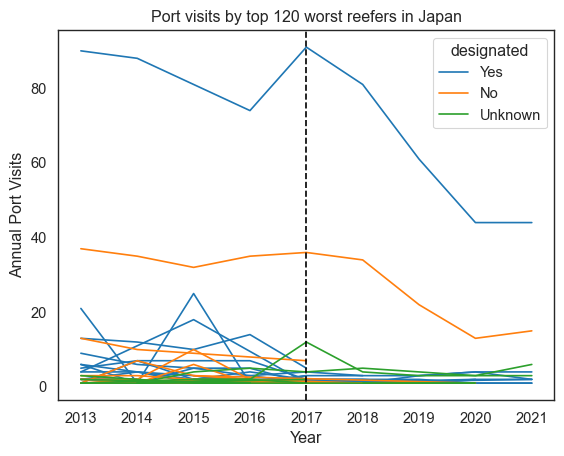

In [165]:
japan_ports_grouped = japan_ports_grouped.loc[((japan_ports_grouped['year']!=2022)&(japan_ports_grouped['year']!=2012)),:]
sns.lineplot(japan_ports_grouped, x='year', y='id', hue='designated', units='port.name', estimator=None)
plt.axvline(2017,c='black',linestyle='--')
plt.title('Port visits by top 120 worst reefers in Japan')
plt.xlabel('Year')
plt.ylabel('Annual Port Visits')
plt.savefig('japan_all.png', dpi=700)
plt.show()

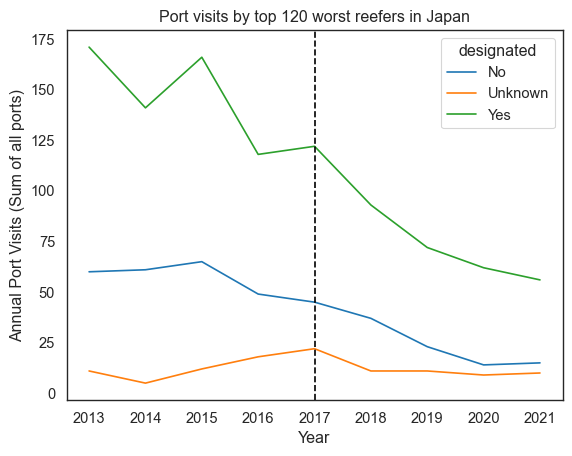

In [166]:
agg_for_des = japan_ports_grouped.groupby(['year', 'designated'])['id'].sum().reset_index()
sns.lineplot(agg_for_des, x='year', y='id', hue='designated')
plt.axvline(2017,c='black',linestyle='--')
plt.title('Port visits by top 120 worst reefers in Japan')
plt.xlabel('Year')
plt.ylabel('Annual Port Visits (Sum of all ports)')
plt.savefig('japan_agg.png', dpi=700)
plt.show()

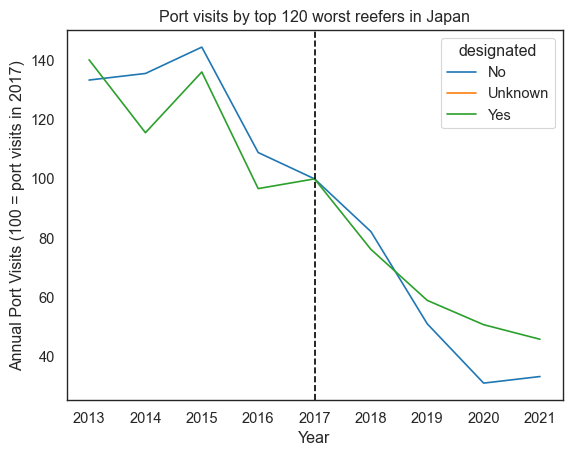

In [167]:

yearly_sum = agg_for_des.groupby('year')['id'].sum().reset_index()


agg_for_des.loc[agg_for_des['designated']=='Yes','norm'] = 100 * agg_for_des.loc[agg_for_des['designated']=='Yes','id'] / agg_for_des.loc[((agg_for_des['year']==2017)&(agg_for_des['designated']=='Yes')),'id'].values[0]
agg_for_des.loc[agg_for_des['designated']=='No','norm'] = 100 * agg_for_des.loc[agg_for_des['designated']=='No','id'] / agg_for_des.loc[((agg_for_des['year']==2017)&(agg_for_des['designated']=='No')),'id'].values[0]

sns.lineplot(agg_for_des, x='year', y='norm', hue='designated')
plt.axvline(2017,c='black',linestyle='--')
plt.title('Port visits by top 120 worst reefers in Japan')
plt.xlabel('Year')
plt.ylabel('Annual Port Visits (100 = port visits in 2017)')
plt.savefig('japan_norm.png', dpi=700)
plt.show()
# agg_for_des

In [168]:
japan_ports_grouped.groupby('port.name')['id'].sum().reset_index().sort_values('id', ascending=False).head(20)

,port.name,id
43,SHIMIZU,654
57,YOKOSUKA,259
9,HAKODATE KO,54
21,KOBE,51
38,OTARU,47
29,MOMBETSU KO,32
45,TAGAJO-SHI,30
25,KUSHIRO,29
48,TOKYO,27
4,FUKUOKA,25


In [169]:
ports_summary.loc[ports_summary['port.country_x']=='JPN'].sort_values('label_absolute_count', ascending=False).head(20)

,port.country_x,port.name,share_of_loitering,port.country_y,label_absolute_count,port.country,label_avg
291,JPN,SHIMIZU,0.823487,JPN,39,JPN,0.847826
306,JPN,YOKOSUKA,0.826062,JPN,35,JPN,0.875000
297,JPN,TOKYO,0.922171,JPN,14,JPN,1.000000
284,JPN,ONOMICHI-ITOZAKI,0.821142,JPN,13,JPN,0.866667
304,JPN,YAWATAHAMA,0.857660,JPN,8,JPN,0.888889
270,JPN,KUSHIKINO,0.838784,JPN,8,JPN,1.000000
294,JPN,TAGAJO-SHI,0.810817,JPN,6,JPN,1.000000
252,JPN,HAKATA,0.885511,JPN,5,JPN,1.000000
277,JPN,MOMBETSU KO,0.999213,JPN,5,JPN,1.000000
285,JPN,OSAKA,0.866655,JPN,5,JPN,1.000000


In [200]:
port_visits = port_visits.loc[port_visits['vessel.id'].isin(top_120['vessel.id'])] ## change this back
kor_ports = port_visits.loc[port_visits['port.country']=='KOR'].copy()
kor_ports['year'] = pd.to_datetime(kor_ports['start']).dt.year
kor_ports_grouped = kor_ports.groupby(['port.name', 'year'])['id'].count().reset_index()

In [201]:
kor_designated = pd.Series(['BUSAN', 'DONGHAE', 'JINHAE', 'JINHAE MAN', 'TONGYEONG', 'MASAN', 'MOKPO'])
kor_not_designated = pd.Series([])
kor_unknown = pd.Series([])


/var/folders/8z/3jxkd1111yv6m0gf9g9kqmdr0000gn/T/ipykernel_40615/1154714806.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  kor_not_designated = pd.Series([])
/var/folders/8z/3jxkd1111yv6m0gf9g9kqmdr0000gn/T/ipykernel_40615/1154714806.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  kor_unknown = pd.Series([])


In [202]:
kor_ports_grouped.loc[kor_ports_grouped['port.name'].isin(kor_designated),'designated'] = 'Yes'
kor_ports_grouped.loc[kor_ports_grouped['port.name'].isin(kor_not_designated),'designated'] = 'No'
kor_ports_grouped.loc[kor_ports_grouped['port.name'].isin(kor_unknown),'designated'] = 'Unknown'

In [203]:
kor_ports_grouped.loc[kor_ports_grouped['designated'].isna(),:].groupby('port.name')['id'].sum().reset_index().sort_values('id', ascending=False)

,port.name,id
0,GADEOK CHANNEL,6
7,OKPO,6
9,YEOSU,5
1,GOHYEON,4
4,INCHON,4
2,HACHEONG,3
6,NAESAN-RI,2
8,SIM-RI,2
3,INCHEON,1
5,MOPPO,1


In [204]:
kor_unknown = kor_unknown.append(pd.Series(kor_ports_grouped.loc[kor_ports_grouped['designated'].isna(),'port.name'].unique()),ignore_index=True)
kor_ports_grouped.loc[kor_ports_grouped['port.name'].isin(kor_unknown),'designated'] = 'Unknown'

/var/folders/8z/3jxkd1111yv6m0gf9g9kqmdr0000gn/T/ipykernel_40615/4289546440.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kor_unknown = kor_unknown.append(pd.Series(kor_ports_grouped.loc[kor_ports_grouped['designated'].isna(),'port.name'].unique()),ignore_index=True)


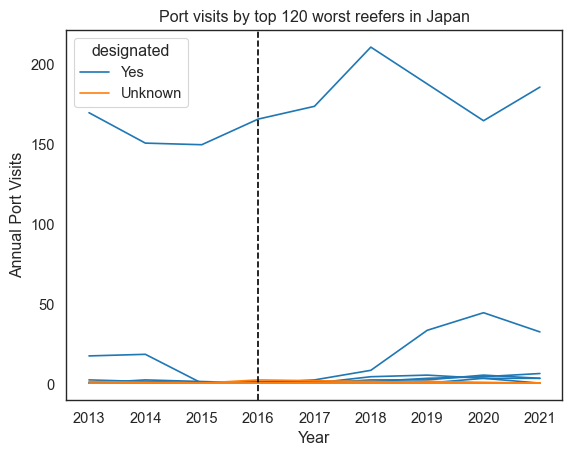

In [205]:
kor_ports_grouped = kor_ports_grouped.loc[((kor_ports_grouped['year']!=2022)&(kor_ports_grouped['year']!=2012)),:]
sns.lineplot(kor_ports_grouped, x='year', y='id', hue='designated', units='port.name', estimator=None)
plt.axvline(2016,c='black',linestyle='--')
plt.title('Port visits by top 120 worst reefers in Japan')
plt.xlabel('Year')
plt.ylabel('Annual Port Visits')
plt.savefig('kor_all.png', dpi=700)
plt.show()

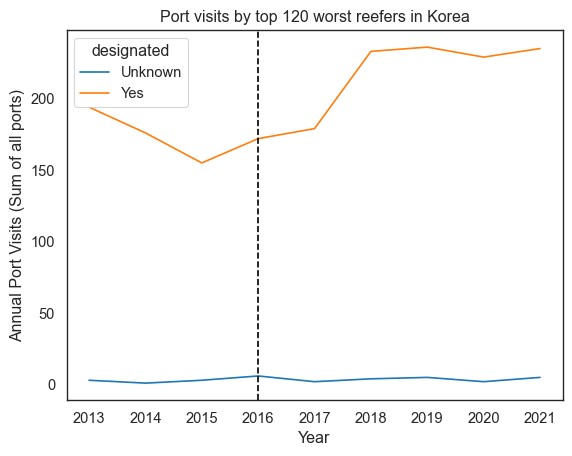

In [206]:
agg_for_des = kor_ports_grouped.groupby(['year', 'designated'])['id'].sum().reset_index()
sns.lineplot(agg_for_des, x='year', y='id', hue='designated')
plt.axvline(2016,c='black',linestyle='--')
plt.title('Port visits by top 120 worst reefers in Korea')
plt.xlabel('Year')
plt.ylabel('Annual Port Visits (Sum of all ports)')
plt.savefig('kor_agg.png', dpi=700)
plt.show()

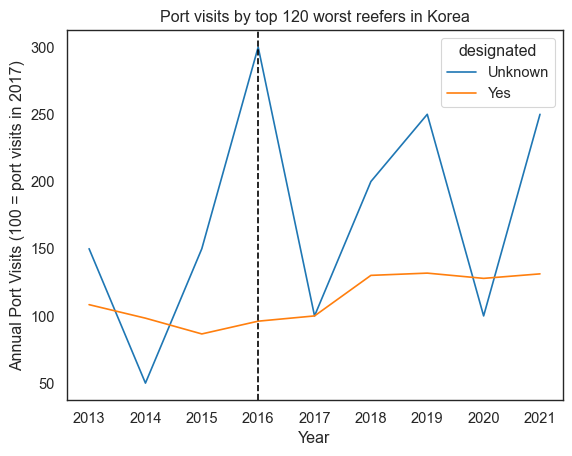

In [207]:
yearly_sum = agg_for_des.groupby('year')['id'].sum().reset_index()
agg_for_des.loc[agg_for_des['designated']=='Yes','norm'] = 100 * agg_for_des.loc[agg_for_des['designated']=='Yes','id'] / agg_for_des.loc[((agg_for_des['year']==2017)&(agg_for_des['designated']=='Yes')),'id'].values[0]
agg_for_des.loc[agg_for_des['designated']=='Unknown','norm'] = 100 * agg_for_des.loc[agg_for_des['designated']=='Unknown','id'] / agg_for_des.loc[((agg_for_des['year']==2017)&(agg_for_des['designated']=='Unknown')),'id'].values[0]

sns.lineplot(agg_for_des, x='year', y='norm', hue='designated')
plt.axvline(2016,c='black',linestyle='--')
plt.title('Port visits by top 120 worst reefers in Korea')
plt.xlabel('Year')
plt.ylabel('Annual Port Visits (100 = port visits in 2017)')
plt.savefig('kor_norm.png', dpi=700)
plt.show()
# agg_for_des